# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 12 </span>
## <span style="color:orange"> Keras - Deep & Convolutional Neural Network image recognition </span>

### Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **<span style="color:red">you should complete</span>**:

#### Creating Convolutional Neural Nets with Keras

Ho creato la rete convoluzionale in questo modo:

- Primo layer convoluzionale già presente
- layer di pooling (MaxPooling2D) con pool_size = 2x2
- Layer di dropout con frazione di input 0.5
- secondo layer convoluzionale, con 16 filtri e kernel size 4x4
- layer di pooling uguale al precedente
- layer di dropout con frazione di input 0.3
- flatten layer
- dense layer con 128 neuroni
- dense layer con 10 neuroni e attivazione softmax

In [7]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
 
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Using TensorFlow backend.


X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [0]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5, seed=5))
    model.add(Conv2D(16, kernel_size=(4,4), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3, seed=8))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', ))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model

In [9]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 32s 536us/step - loss: 0.9811 - accuracy: 0.6680 - val_loss: 0.2581 - val_accuracy: 0.9325
Epoch 2/5
60000/60000 [==============================] - 33s 542us/step - loss: 0.3448 - accuracy: 0.8919 - val_loss: 0.1439 - val_accuracy: 0.9603
Epoch 3/5
60000/60000 [==============================] - 37s 620us/step - loss: 0.2445 - accuracy: 0.9249 - val_loss: 0.1067 - val_accuracy: 0.9678
Epoch 4/5
60000/60000 [==============================] - 33s 549us/step - loss: 0.2041 - accuracy: 0.9375 - val_loss: 0.0925 - val_accuracy: 0.9714
Epoch 5/5
10000/10000 [==============================] - 2s 228us/step

Test loss: 0.08106455098688603
Test accuracy: 0.9763000011444092


### CNN Performance

10000/10000 [==============================] - 2s 218us/step

Test loss: 0.08106455098688603
Test accuracy: 0.9763000011444092


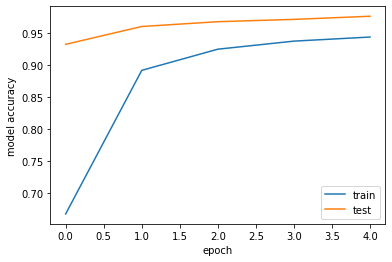

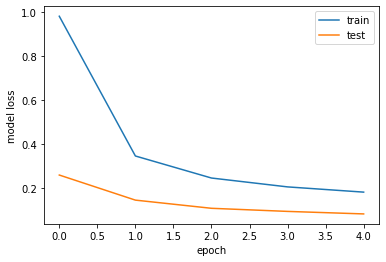

In [10]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(model_CNN.history.history['accuracy'])
plt.plot(model_CNN.history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(model_CNN.history.history['loss'])
plt.plot(model_CNN.history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

In [27]:
from PIL import Image
import os

digit_0 = "./0.png"
digit_1 = "./1.png"
digit_2 = "./2.png"
digit_3 = "./3.png"
digit_4 = "./4.png"
digit_5 = "./5.png"
digit_6 = "./6.png"
digit_7 = "./7.png"
digit_8 = "./8.png"
digit_9 = "./9.png"
digita_0 = Image.open(digit_0).convert('L')
digita_1 = Image.open(digit_1).convert('L')
digita_2 = Image.open(digit_2).convert('L')
digita_3 = Image.open(digit_3).convert('L')
digita_4 = Image.open(digit_4).convert('L')
digita_5 = Image.open(digit_5).convert('L')
digita_6 = Image.open(digit_6).convert('L')
digita_7 = Image.open(digit_7).convert('L')
digita_8 = Image.open(digit_8).convert('L')
digita_9 = Image.open(digit_9).convert('L')

ydim, xdim = digita_0.size
print("Images size: "+str(xdim)+"x"+str(ydim))
pix0=digita_0.load()
pix1=digita_1.load()
pix2=digita_2.load()
pix3=digita_3.load()
pix4=digita_4.load()
pix5=digita_5.load()
pix6=digita_6.load()
pix7=digita_7.load()
pix8=digita_8.load()
pix9=digita_9.load()
data0 = np.zeros((xdim, ydim))
data1 = np.zeros((xdim, ydim))
data2 = np.zeros((xdim, ydim))
data3 = np.zeros((xdim, ydim))
data4 = np.zeros((xdim, ydim))
data5 = np.zeros((xdim, ydim))
data6 = np.zeros((xdim, ydim))
data7 = np.zeros((xdim, ydim))
data8 = np.zeros((xdim, ydim))
data9 = np.zeros((xdim, ydim))

for j in range(ydim):
    for i in range(xdim):
        data0[i,j]=pix0[j,i]
        data1[i,j]=pix1[j,i]
        data2[i,j]=pix2[j,i]
        data3[i,j]=pix3[j,i]
        data4[i,j]=pix4[j,i]
        data5[i,j]=pix5[j,i]
        data6[i,j]=pix6[j,i]
        data7[i,j]=pix7[j,i]
        data8[i,j]=pix8[j,i]
        data9[i,j]=pix9[j,i]
        
data0 /= 255
data1 /= 255
data2 /= 255
data3 /= 255
data4 /= 255
data5 /= 255
data6 /= 255
data7 /= 255
data8 /= 255
data9 /= 255


Images size: 28x28


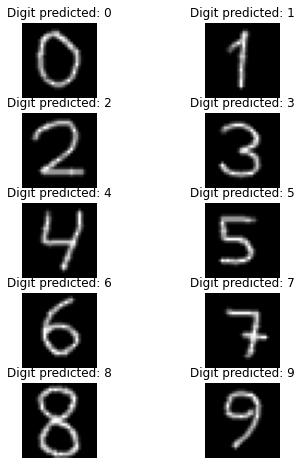

In [28]:
data0 = data0.reshape(1,xdim,ydim,1)
pred_0 = model_CNN.predict(data0)
data1 = data1.reshape(1,xdim,ydim,1)
pred_1 = model_CNN.predict(data1)
data2 = data2.reshape(1,xdim,ydim,1)
pred_2 = model_CNN.predict(data2)
data3 = data3.reshape(1,xdim,ydim,1)
pred_3 = model_CNN.predict(data3)
data4 = data4.reshape(1,xdim,ydim,1)
pred_4 = model_CNN.predict(data4)
data5 = data5.reshape(1,xdim,ydim,1)
pred_5 = model_CNN.predict(data5)
data6 = data6.reshape(1,xdim,ydim,1)
pred_6 = model_CNN.predict(data6)
data7 = data7.reshape(1,xdim,ydim,1)
pred_7 = model_CNN.predict(data7)
data8 = data8.reshape(1,xdim,ydim,1)
pred_8 = model_CNN.predict(data8)
data9 = data9.reshape(1,xdim,ydim,1)
pred_9 = model_CNN.predict(data9)

data0 = data0.reshape(xdim,ydim)
data1 = data1.reshape(xdim,ydim)
data2 = data2.reshape(xdim,ydim)
data3 = data3.reshape(xdim,ydim)
data4 = data4.reshape(xdim,ydim)
data5 = data5.reshape(xdim,ydim)
data6 = data6.reshape(xdim,ydim)
data7 = data7.reshape(xdim,ydim)
data8 = data8.reshape(xdim,ydim)
data9 = data9.reshape(xdim,ydim)

plt.figure(figsize=(6, 8))
plt.subplot(5,2,1)  
plt.imshow(data0, cmap='gray')    
plt.title("Digit predicted: {}".format(np.argmax(pred_0)))
plt.axis('off')
plt.subplot(5,2,2)  
plt.imshow(data1, cmap='gray')    
plt.title("Digit predicted: {}".format(np.argmax(pred_1)))
plt.axis('off') 
plt.subplot(5,2,3)  
plt.imshow(data2, cmap='gray')    
plt.title("Digit predicted: {}".format(np.argmax(pred_2)))
plt.axis('off') 
plt.subplot(5,2,4)  
plt.imshow(data3, cmap='gray')    
plt.title("Digit predicted: {}".format(np.argmax(pred_3)))
plt.axis('off') 
plt.subplot(5,2,5)  
plt.imshow(data4, cmap='gray')    
plt.title("Digit predicted: {}".format(np.argmax(pred_4)))
plt.axis('off') 
plt.subplot(5,2,6)  
plt.imshow(data5, cmap='gray')    
plt.title("Digit predicted: {}".format(np.argmax(pred_5)))
plt.axis('off') 
plt.subplot(5,2,7)  
plt.imshow(data6, cmap='gray')    
plt.title("Digit predicted: {}".format(np.argmax(pred_6)))
plt.axis('off') 
plt.subplot(5,2,8)  
plt.imshow(data7, cmap='gray')    
plt.title("Digit predicted: {}".format(np.argmax(pred_7)))
plt.axis('off') 
plt.subplot(5,2,9)  
plt.imshow(data8, cmap='gray')    
plt.title("Digit predicted: {}".format(np.argmax(pred_8)))
plt.axis('off')
plt.subplot(5,2,10)  
plt.imshow(data9, cmap='gray')    
plt.title("Digit predicted: {}".format(np.argmax(pred_9)))
plt.axis('off')   
plt.show()